<h1><center><font size = 10>Detecting Distracted Drivers</font></center></h1>
<h1><center><font size = 6>Zach Chase</font></center></h1>

Write my introduction here

In [188]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import ImageFont
import seaborn as sns
from dask.array.image import imread
from skimage import color
import os
import cv2
import visualkeras

import os
import random
import numpy as np
import pandas as pd 
from skimage import io
from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings



import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers


In [175]:
key = { "C0": "Safe Driving",
"C1": "Texting - Right",
"C2": "Talking on the Phone - Right",
"C3": "Texting - Left",
"C4": "Talking on the Phone - Left",
"C5": "Operating the Radio",
"C6": "Drinking",
"C7": "Reaching Behind",
"C8": "Hair and Makeup",
"C9": "Talking to Passenger" }

In [4]:
driver_details = pd.read_csv('state-farm-distracted-driver-detection/driver_imgs_list.csv')
driver_details.head()

subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

In [90]:
train_image = []

for i in range(10):
    print('now we are in the folder C',i)
    labels = imread("state-farm-distracted-driver-detection/imgs/train/c"+str(i)+"/*.jpg")
    for j in range(len(labels)):
        img = labels[j]
        img = color.rgb2gray(img)
        #img = imshow(img)
        #img = img[50:,120:-50]
        img = cv2.resize(img,(224,224))
        train_image.append([img,i]) 

now we are in the folder C 0
now we are in the folder C 1
now we are in the folder C 2
now we are in the folder C 3
now we are in the folder C 4
now we are in the folder C 5
now we are in the folder C 6
now we are in the folder C 7
now we are in the folder C 8
now we are in the folder C 9


In [ ]:
# getting one image per label
f, ax = plt.subplots(2,2, figsize = (120,120))
for i in range(1):
    labels = imread("state-farm-distracted-driver-detection/imgs/train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        print(img.shape)
        label = i
        ax[i].imshow(img)
        ax[i].set_title('C'+str(i))
        plt.show

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(430, 470)
(430, 470)
(430, 470)
(430, 470)
(430, 470)
(430, 470)
(430, 470)
(430, 470)
(430, 470)
(430, 470)


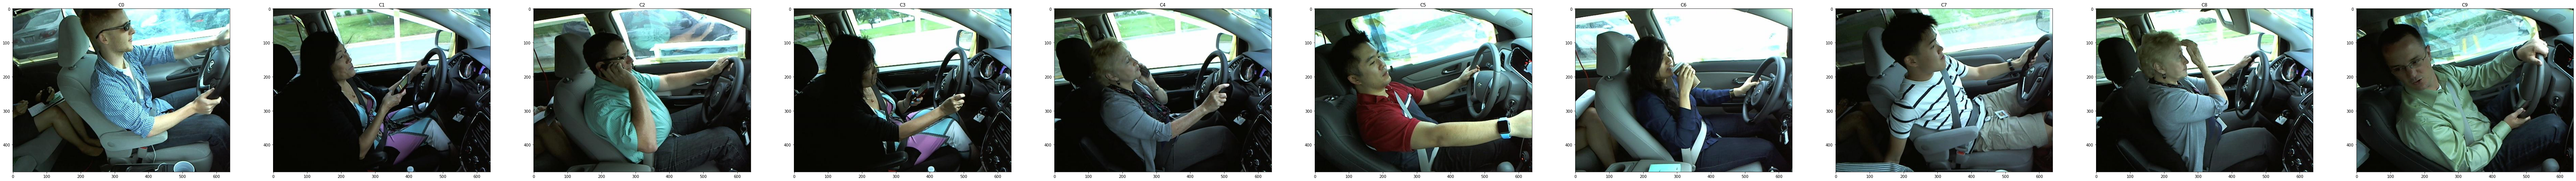

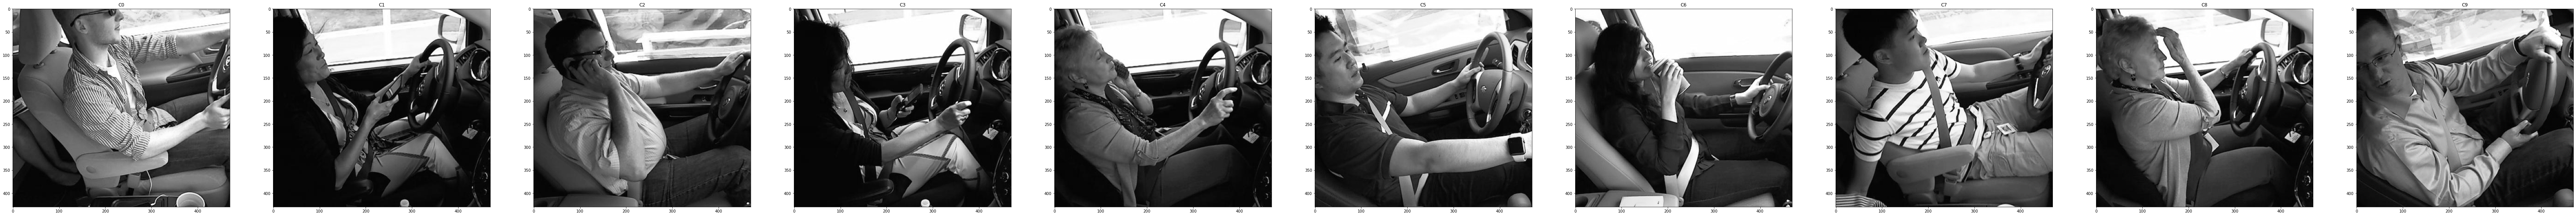

In [6]:
# getting one image per label
f, ax = plt.subplots(1,10, figsize = (120,120))
for i in range(10):
    labels = imread("state-farm-distracted-driver-detection/imgs/train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        print(img.shape)
        label = i
        ax[i].imshow(img)
        ax[i].set_title('C'+str(i))
        plt.show


# After Editing
f, ax = plt.subplots(1,10, figsize = (120,120))
for i in range(10):
  #print('now we are in the folder C',i)
    labels = imread("state-farm-distracted-driver-detection/imgs/train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        img = color.rgb2gray(img)
        img = img[50:,120:-50]
        label = i
        print(img.shape)
        ax[i].imshow(img,cmap='gray')
        ax[i].set_title('C'+str(i))
        plt.show

In [6]:
## Randomly shuffling the images

import random
random.shuffle(train_image)

In [75]:
key['C{}'.format(0)]

'safe driving'

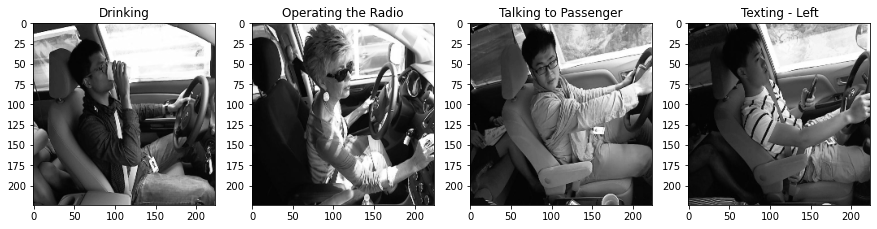

In [219]:
# getting one image per label
f, ax = plt.subplots(1,4, figsize = (15,8))
counter = 0
random.shuffle(train_image)
for i in range(4):
    img = train_image[i][0]
    ax[i].imshow(img, cmap = 'gray')
    label = train_image[i][1]
    ax[i].set_title(key['C{}'.format(label)])
    plt.show

In [105]:
## Splitting the image and label to two different lists

X = []
Y = []
for features,labels in train_image:
    X.append(features)
    Y.append(labels)

print (len(X), len(Y))

22424 22424


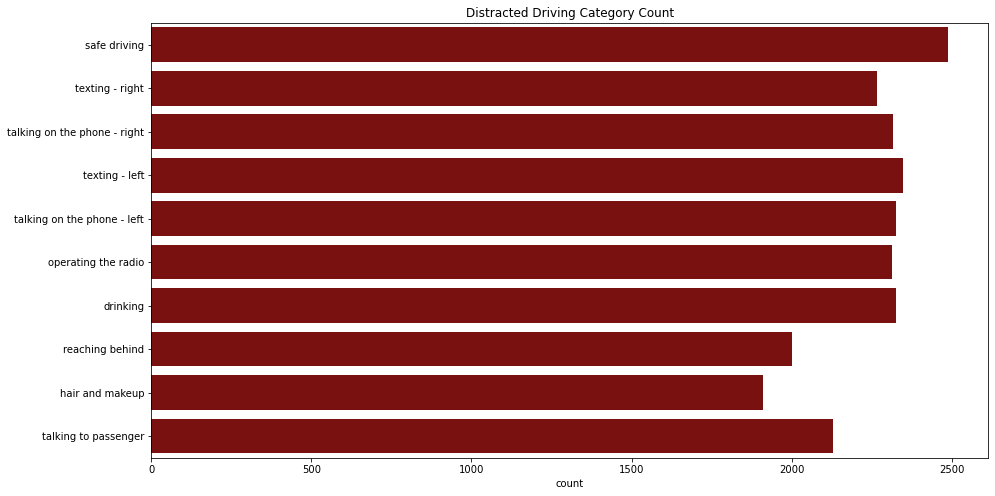

In [65]:
plt.figure(figsize=(15,8))
ax = sns.countplot(y = Y, color = 'darkred')
ax.set(yticks=range(len(key.values())), yticklabels=[i for i in key.values()])
ax.set_title("Distracted Driving Category Count")
plt.show()

In [23]:
key.values()

dict_values(['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger'])

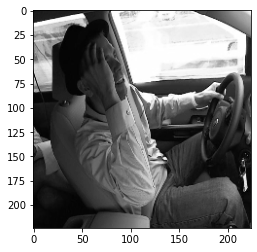

8


In [106]:
plt.imshow(X[5],cmap='gray')
plt.show()
print(Y[5])

In [107]:
## Converting images to nparray. Encoding the Y

X = np.array(X).reshape(-1,224,224,1)
Y = to_categorical(Y)

# X2 = cv2.merge([X,X,X])
# X2 = np.array(X2).reshape(-1,224,224,3)
# print (X2.shape)
print (X.shape)

(22424, 224, 224, 1)


In [108]:
X.shape

(22424, 224, 224, 1)

In [109]:
Y.shape

(22424, 10)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [113]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,1),padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))


model.add(Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [114]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
561/561 [==============================] - 1165s 2s/step - loss: 0.3977 - accuracy: 0.8861 - val_loss: 0.3103 - val_accuracy: 0.9452
Epoch 2/3
 16/561 [..............................] - ETA: 17:28 - loss: 0.0285 - accuracy: 0.9941

KeyboardInterrupt: 

In [16]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [130]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(224,224,1),padding = 'same')) #32
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',padding = 'same')) #54
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu')) #128
model.add(Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [131]:
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
561/561 [==============================] - 330s 588ms/step - loss: 0.7262 - accuracy: 0.7807 - val_loss: 0.3848 - val_accuracy: 0.9663
Epoch 2/10
561/561 [==============================] - 339s 603ms/step - loss: 0.0586 - accuracy: 0.9933 - val_loss: 0.0546 - val_accuracy: 0.9926
Epoch 3/10
561/561 [==============================] - 313s 558ms/step - loss: 0.0241 - accuracy: 0.9988 - val_loss: 0.0347 - val_accuracy: 0.9946
Epoch 4/10
561/561 [==============================] - 307s 547ms/step - loss: 0.0145 - accuracy: 0.9996 - val_loss: 0.0283 - val_accuracy: 0.9953
Epoch 5/10
561/561 [==============================] - 307s 546ms/step - loss: 0.0099 - accuracy: 0.9999 - val_loss: 0.0243 - val_accuracy: 0.9958
Epoch 6/10
561/561 [==============================] - 302s 538ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 0.9955
Epoch 7/10
561/561 [==============================] - 303s 541ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0200 -

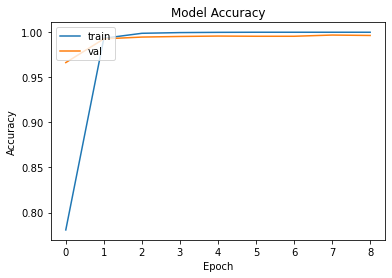

In [220]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [133]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 224, 224, 16)      160       
                                                                 
 batch_normalization_10 (Bat  (None, 224, 224, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 batch_normalization_11 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                      

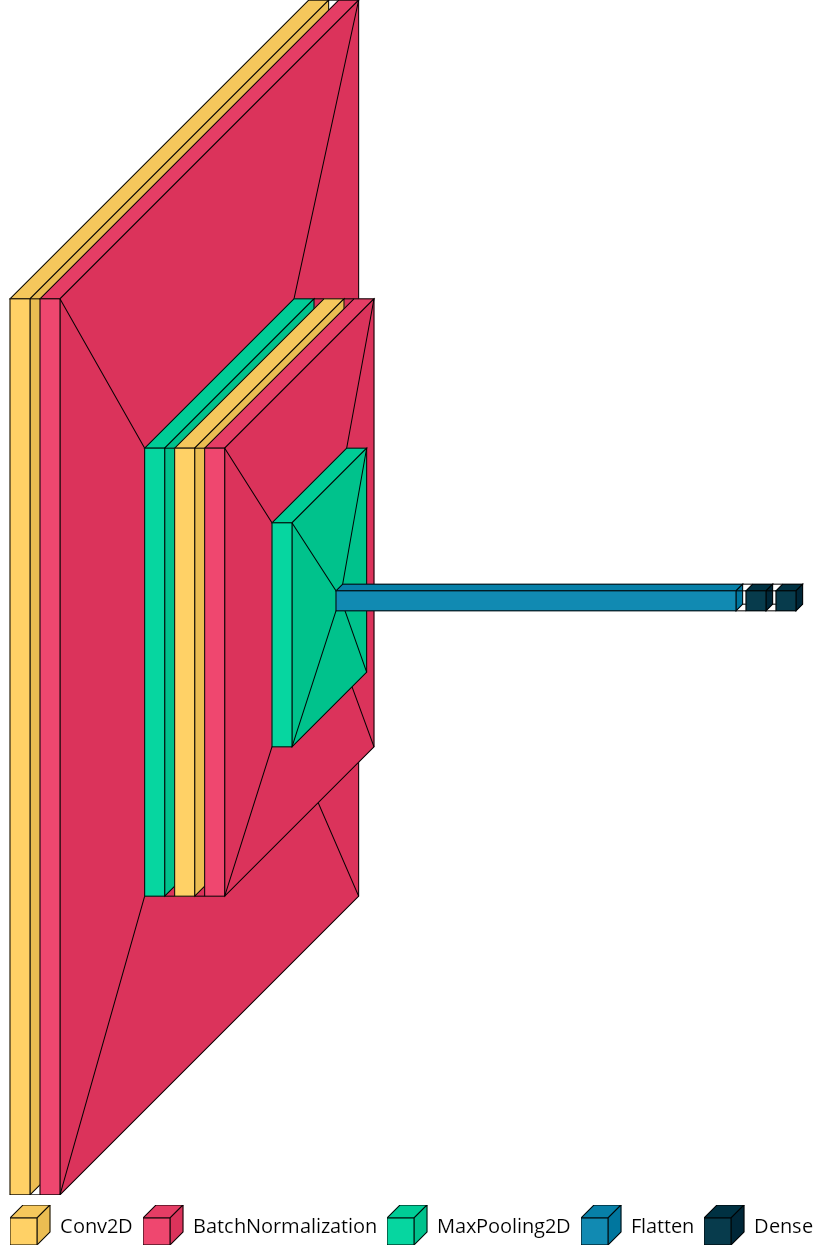

In [200]:
font = ImageFont.truetype("OpenSans-Regular.ttf", 20)
visualkeras.layered_view(model, legend=True, font = font)  # font is optional!

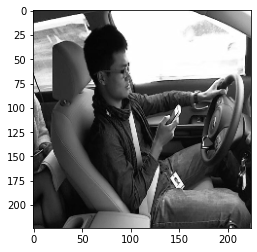

In [142]:
plt.imshow(X[8],cmap='gray')
plt.show()

In [146]:
model.predict_proba(X[8])

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [148]:
z = model.predict(X_test)

141/141 [==============================] - 26s 184ms/step


In [150]:
z[0]

array([3.5968248e-09, 1.7848048e-05, 5.4549612e-04, 3.3364881e-06,
       1.5560678e-07, 9.9937469e-01, 4.2689662e-05, 1.1884737e-05,
       3.9132806e-06, 7.1057279e-08], dtype=float32)

In [176]:
for prob, category in zip(z[2], key.values()):
    print(str(category) + " Prediction: " + str(float("{:.3f}".format(float(prob*100)))) + "%")

Safe Driving Prediction: 0.001%
Texting - Right Prediction: 99.837%
Talking on the Phone - Right Prediction: 0.004%
Texting - Left Prediction: 0.135%
Talking on the Phone - Left Prediction: 0.001%
Operating the Radio Prediction: 0.002%
Drinking Prediction: 0.013%
Reaching Behind Prediction: 0.001%
Hair and Makeup Prediction: 0.004%
Talking to Passenger Prediction: 0.003%


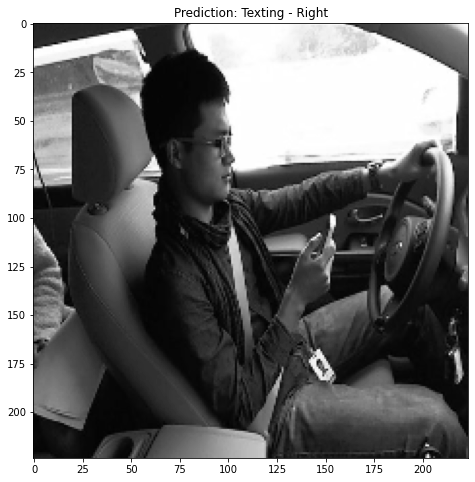

In [187]:
plt.figure(figsize=(8,8))
plt.imshow(X_test[2],cmap='gray')
plt.title("Prediction: " + key["C{}".format(np.argmax(z[2]))])
plt.show()

In [180]:
key["C{}".format(np.argmax(z[2]))]

'Texting - Right'